<a href="https://colab.research.google.com/github/Jennylin331431/JSC270_NLP_Project/blob/main/Part_II_Having_fun_with_NLP_using_the_Twitter_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieve Data Set 

In [ ]:
import tweepy as tw
import csv #Import csv

In [ ]:
# Use credentials to authorize access
auth = tw.OAuthHandler('JpudYifLLJpILP2l5kVoHDj9s', 'Qdwdl6llsSoMVsVukeAcoR4RgkAdf5xdk4fVPiAakrPH8x7u0J')
auth.set_access_token('1501628668040384513-mWlZCtzphRpCXCpT4DzCU5y9SgnpeW','9z7q0ePlmXH1wmos6mJg6rESj1evx8Euh4B48pUgriWZC')
api = tw.API(auth, wait_on_rate_limit=True)

##convert data into a csv file


In [ ]:

#define our search word
search_words = '#ukraine'

#filter out tweets with retweets, images, links
search_with_filter = search_words + " -filter:retweets" + " -filter:images" +  " -filter:links"

#starting date of the data wanted
date_since = "2022-03-18"

# Open/create a file to append data to
csvFile = open('1000.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)
tweets = tw.Cursor(api.search,
              q=search_with_filter,
              lang="en",
              since=date_since,
              exclude_replies=True, #exclude replies
              trim_user=True,
              until = '2022-03-20',
              tweet_mode='extended',
              ).items(1200) #1000 tweets

#put all tweets into a list
a = [tweet for tweet in tweets]

#iterate through the tweets to write into csv file
for tweet in a:
    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf-8')])
    print (tweet.created_at, tweet.full_text)
csvFile.close()

#EDA

In [2]:
# Import data
from google.colab import files
data = files.upload()

Saving result.csv to result.csv


In [3]:
#imports
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
#read csv file
data = pd.read_csv(io.BytesIO(data['result.csv']), sep = ',')

In [5]:
#first 10 rows of data
data['Tweet'].head(10)

0    b"@anneapplebaum We'll see. E.U. usually moves...
1    b'According to #NATO, treaties matter more tha...
2    b'@JoeBiden let #ukraine down like #Afghanista...
3    b'@Geof17773624 Consumer impact has been but a...
4    b'The medias BS in getting Tuchel to join Man ...
5    b'- #Russia invasion of #Ukraine has overshado...
6    b"The #russianbomb hasn't hit my house yet, bu...
7    b"@VP Who made you VP, you don't even know tha...
8    b"@JuliaHB1 @BorisJohnson A more accurate comp...
9    b'Sorry #Ukraine, you are not part of our club...
Name: Tweet, dtype: object

In [6]:
#the counts of each Sentiment within the dataset
data.value_counts('Sentiment')

Sentiment
0    786
1    413
dtype: int64

In [7]:
#set seed to avoid different train/test splits every time
np.random.seed(100)
#split the data set into train and test by 30/70
X_train, X_test, y_train, y_test = train_test_split(data['Tweet'], data['Sentiment'], test_size = 0.3, random_state = 42)

In [8]:
# Make training and testing datasets
train_data = pd.DataFrame({"Tweet": X_train, "Sentiment": y_train})
test_data = pd.DataFrame({"Tweet": X_test, "Sentiment": y_test})

In [9]:
#count sentiments in train data
train_data.value_counts('Sentiment')

Sentiment
0    550
1    289
dtype: int64

In [10]:
#count sentiments in test data
test_data.value_counts('Sentiment')

Sentiment
0    236
1    124
dtype: int64

## Preprocessing functions

In [19]:
#imports 
import nltk
import re
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
# Tokenize data
# Download the tokenizer
nltk.download('punkt')

#tokenize dataset
def tokenize(data, column_to_tokenize, column_save_tokens):
  data[column_save_tokens] = data[column_to_tokenize].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
##### Remove URL tokens #####
def remove_URL_tokens(data, column):
  tokens_no_URL = []
  # Create a list of lists with what we want
  for row in data[column]:
    tokens_no_URL.append([re.sub(r'http\S+','', t) for t in row])
  # add the new info to our df
  data[column] = tokens_no_URL

In [14]:
##### Convert tokens into lowercase ####
def convert_lowercase(data, column):
  lowercase_tokens = []
  # Create a list of lists with what we want
  for row in data[column]:
    lowercase_tokens.append([t.lower() for t in row])
  # add the new info to our df
  data[column] = lowercase_tokens

In [15]:
##### Remove punctuation and special characters #####
def remove_special_char(data, column):
  tokens_no_punct = []
  # Create a list of lists with what we want
  for row in data[column]:
    tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
  # add the new info to our df
  data[column] = tokens_no_punct

In [16]:
##### Remove empty tokens #####
def remove_empty_tokens(data, column):
  tokens_no_empty = []
  for row in data[column]:
    tokens_no_empty.append([w for w in row if (w != '')])
  data[column] = tokens_no_empty

In [17]:
#### Stemming tokens ####

#use PorterStemmer
stemmer = PorterStemmer()

def stem_tokens(data, column):
  stemmed_tokens = []
  for row in data[column]:
    stemmed_tokens.append([stemmer.stem(t) for t in row])

  data[column] = stemmed_tokens

In [20]:
#### Lemmatize the Dataset ####
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(data, column):
  lem_tokens = []
  for row in data[column]:
    lem_tokens.append([lemmatizer.lemmatize(t) for t in row])
  data[column] = lem_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
##### Remove Stopwords #####
nltk.download('stopwords')
sw = stopwords.words('english')[:100]
# Remove stopwords

def remove_stopwords(data, column):
  tokens_no_sw = []
  for row in data[column]:
    tokens_no_sw.append([w for w in row if w not in sw])
  # Add column to df
  data[column] = tokens_no_sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## EDA using preprocessing functions on training dataset

In [22]:
#tokenize train data
tokenize(train_data, 'Tweet', 'tokens')

In [23]:
#view tokens of first 10 rows in train data
train_data['tokens'].head(10)

522     [b, ', @, Hromadske, Russians, using, chemical...
213     [b, ', #, Russian, aviation, has, significantl...
120     [b, ', @, lesiavasylenko, How, do, you, know, ...
916     [b, ', @, PaulaChertok, @, JuliaDavisNews, @, ...
1066    [b'1/, The, Prosecutor, of, the, International...
1116    [b'Knowledgeable, panel, @, JoyAnnReid, Very, ...
72      [b, ', @, Alex_Uhtz, @, JeroenLoos1, @, Sorrel...
820     [b, ', #, JoeBiden, you, can, help, clean, up,...
746     [b, ', @, rnz_news, The, only, reason, they, w...
715     [b'Privileged, to, be, sharing, the, same, hot...
Name: tokens, dtype: object

In [ ]:
#remove URL tokens from train data
remove_URL_tokens(train_data, 'tokens')
train_data['tokens'].head(10)

522     [b, ', @, Hromadske, Russians, using, chemical...
213     [b, ', #, Russian, aviation, has, significantl...
120     [b, ', @, lesiavasylenko, How, do, you, know, ...
916     [b, ', @, PaulaChertok, @, JuliaDavisNews, @, ...
1066    [b'1/, The, Prosecutor, of, the, International...
1116    [b'Knowledgeable, panel, @, JoyAnnReid, Very, ...
72      [b, ', @, Alex_Uhtz, @, JeroenLoos1, @, Sorrel...
820     [b, ', #, JoeBiden, you, can, help, clean, up,...
746     [b, ', @, rnz_news, The, only, reason, they, w...
715     [b'Privileged, to, be, sharing, the, same, hot...
Name: tokens, dtype: object

In [24]:
#convert all tokens to lowercases in train data
convert_lowercase(train_data, 'tokens')
train_data['tokens'].head(10)

522     [b, ', @, hromadske, russians, using, chemical...
213     [b, ', #, russian, aviation, has, significantl...
120     [b, ', @, lesiavasylenko, how, do, you, know, ...
916     [b, ', @, paulachertok, @, juliadavisnews, @, ...
1066    [b'1/, the, prosecutor, of, the, international...
1116    [b'knowledgeable, panel, @, joyannreid, very, ...
72      [b, ', @, alex_uhtz, @, jeroenloos1, @, sorrel...
820     [b, ', #, joebiden, you, can, help, clean, up,...
746     [b, ', @, rnz_news, the, only, reason, they, w...
715     [b'privileged, to, be, sharing, the, same, hot...
Name: tokens, dtype: object

In [25]:
#remove special characters from train data
remove_special_char(train_data, 'tokens')
#remove empty tokens from train data
remove_empty_tokens(train_data, 'tokens')
train_data['tokens'].head(10)

522     [b, hromadske, russians, using, chemical, weap...
213     [b, russian, aviation, has, significantly, red...
120     [b, lesiavasylenko, how, do, you, know, they, ...
916     [b, paulachertok, juliadavisnews, acosta, russ...
1066    [b1, the, prosecutor, of, the, international, ...
1116    [bknowledgeable, panel, joyannreid, very, inte...
72      [b, alex_uhtz, jeroenloos1, sorrelz, avalaina,...
820     [b, joebiden, you, can, help, clean, up, the, ...
746     [b, rnz_news, the, only, reason, they, would, ...
715     [bprivileged, to, be, sharing, the, same, hote...
Name: tokens, dtype: object

In [26]:
#lemmatize tokens in train data
lemmatize_tokens(train_data, 'tokens')
train_data['tokens'].head(10)

522     [b, hromadske, russian, using, chemical, weapo...
213     [b, russian, aviation, ha, significantly, redu...
120     [b, lesiavasylenko, how, do, you, know, they, ...
916     [b, paulachertok, juliadavisnews, acosta, russ...
1066    [b1, the, prosecutor, of, the, international, ...
1116    [bknowledgeable, panel, joyannreid, very, inte...
72      [b, alex_uhtz, jeroenloos1, sorrelz, avalaina,...
820     [b, joebiden, you, can, help, clean, up, the, ...
746     [b, rnz_news, the, only, reason, they, would, ...
715     [bprivileged, to, be, sharing, the, same, hote...
Name: tokens, dtype: object

In [27]:
#remove stopwords in train data
remove_stopwords(train_data, 'tokens')
train_data['tokens'].head(10)

522     [b, hromadske, russian, using, chemical, weapo...
213     [b, russian, aviation, ha, significantly, redu...
120     [b, lesiavasylenko, how, know, havnt, many, ru...
916     [b, paulachertok, juliadavisnews, acosta, russ...
1066    [b1, prosecutor, international, criminal, cour...
1116    [bknowledgeable, panel, joyannreid, very, inte...
72      [b, alex_uhtz, jeroenloos1, sorrelz, avalaina,...
820     [b, joebiden, can, help, clean, mess, help, ma...
746     [b, rnz_news, only, reason, would, use, ukrain...
715     [bprivileged, sharing, same, hotel, ukraine, d...
Name: tokens, dtype: object

## Visualizations

In [ ]:
## Lemmatized train_data
# can try changing the functions applied to the data and see how the result changes
tokenize(train_data, 'Tweet', 'lem_tokens')
remove_URL_tokens(train_data, 'lem_tokens')
convert_lowercase(train_data, 'lem_tokens')
remove_special_char(train_data, 'lem_tokens')
remove_empty_tokens(train_data, 'lem_tokens')
lemmatize_tokens(train_data, 'lem_tokens')
remove_stopwords(train_data, 'lem_tokens')

In [ ]:
## Stemmed train_data
# can try changing the functions applied to the data and see how the result changes
tokenize(train_data, 'Tweet', 'stem_tokens')
remove_URL_tokens(train_data, 'stem_tokens')
convert_lowercase(train_data, 'stem_tokens')
remove_special_char(train_data, 'stem_tokens')
remove_empty_tokens(train_data, 'stem_tokens')
stem_tokens(train_data, 'stem_tokens')
remove_stopwords(train_data, 'stem_tokens')

### Word cloud

In [ ]:
# concatenate tokens (helper function for make_word_cloud)
def string_tokens(data, column):
    collect = ''
    for tokens in data[column]:
      for t in tokens:
        collect = collect + ' ' + t
    return collect

In [ ]:
# change the value to black (helper function for make_word_cloud)
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs): 
  return("hsl(0,100%, 1%)")

In [ ]:
#imports
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [ ]:
## https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

# Make word cloud and display it
def make_word_cloud(data, column):
  words = string_tokens(data, column)
  wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(words)
  wordcloud.recolor(color_func = black_color_func)
  plt.figure(figsize=[15,10])
  plt.imshow(wordcloud)

#### Word cloud for lemmatized data 

In [ ]:
#for non-supporting tweets
make_word_cloud(train_data[train_data['Sentiment'] == 0], 'lem_tokens')

In [ ]:
#for supporing tweets
make_word_cloud(train_data[train_data['Sentiment'] == 1], 'lem_tokens')

#### Word cloud for stemmed tokens

In [ ]:
#for non-supporing tweets
make_word_cloud(train_data[train_data['Sentiment'] == 0], 'stem_tokens')

In [ ]:
#for supporing tweets
make_word_cloud(train_data[train_data['Sentiment'] == 0], 'stem_tokens')

## apply the preprocessing functions to data for the analysis

In [28]:
# can try changing the functions applied to the data and see how the result changes

#apply preprocessing functions to train data
tokenize(train_data, 'Tweet', 'tokens')
remove_URL_tokens(train_data, 'tokens')
convert_lowercase(train_data, 'tokens')
remove_special_char(train_data, 'tokens')
remove_empty_tokens(train_data, 'tokens')
lemmatize_tokens(train_data, 'tokens')
remove_stopwords(train_data, 'tokens')


In [29]:
# can try changing the functions applied to the data and see how the result changes

#apply preprocessing functions to test data
tokenize(test_data, 'Tweet', 'tokens')
remove_URL_tokens(test_data, 'tokens')
convert_lowercase(test_data, 'tokens')
remove_special_char(test_data, 'tokens')
remove_empty_tokens(test_data, 'tokens')
lemmatize_tokens(test_data, 'tokens')
remove_stopwords(test_data, 'tokens')

# Model Fitting

### Use of CountVectorizer

In [30]:
#import
from sklearn.feature_extraction.text import CountVectorizer

# Separate labels from features, converting to numpy arrays
X_train, y_train = train_data['tokens'].to_numpy(), train_data['Sentiment'].to_numpy()
X_test, y_test = test_data['tokens'].to_numpy(), test_data['Sentiment'].to_numpy()

#overriding function
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Fit training data using CountVectorizer
counts_train = count_vec.fit_transform(X_train)
print(counts_train.toarray())

# Fit testing data using CountVectorizer
counts_test = count_vec.transform(X_test)
print(counts_test.toarray())

# Print the names of each of the features (1000 total))
print("Length of vocabulary: ", len(count_vec.vocabulary_))
# Print this mapping as dictionary
print(count_vec.vocabulary_)

## Which row represents 'great'
print('\nGreat is located at row: ',count_vec.vocabulary_['great'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Length of vocabulary:  1000
{'b': 85, 'russian': 708, 'using': 913, 'chemical': 154, 'weapon': 943, 'now': 579, 'ukraine': 879, 'aviation': 80, 'ha': 368, 'ukrainian': 891, 'reported': 695, 'air': 30, 'force': 327, 'day': 213, 'defense': 222, 'shot': 748, 'three': 845, 'lesiavasylenko': 473, 'how': 395, 'know': 454, 'many': 505, 'all': 33, 'hate': 375, 'violence': 923, 'happening': 374, 'russia': 706, 'commits': 175, 'warcrimes': 934, 'democracy': 226, 'must': 541, 'united': 901, 'save': 722, 'world': 969, 'peacekeeping': 618, 'mission': 528, 'there': 835, 'no': 570, 'other': 605, 'way': 941, 'child': 157, 'woman': 962, 'journalist': 441, 'need': 551, 'u': 876, 'government': 363, 'move': 538, 'rhetoric': 698, 'action': 20, 'standwithukraine': 783, 's

In [31]:
#imports 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data (default alpha = 1 has Laplace smoothing)
nb.fit(counts_train.toarray(), y_train)

# Predict on test data
y_preds_test = nb.predict(counts_test.toarray())

# Predict on train data
y_preds_train = nb.predict(counts_train.toarray())

#Print test/train accuracy
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds_test))
print('Training accuracy with simple Naive Bayes:',accuracy_score(y_train,y_preds_train))

Test accuracy with simple Naive Bayes: 0.7138888888888889
Training accuracy with simple Naive Bayes: 0.8545887961859356


In [32]:
#function to print out the top n most probable words for the class
def most_probable_word_for_class(vectorizer, classifier, classlabel, n):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.feature_count_[classlabel][:], feature_names))[-n:]
    for coef, feat in topn:
        print("word: ", feat, "count: ", coef)  

In [33]:
#Print 10 most probable words for non-supporting tweets
print("Ten most probable words for non-support/neutral Ukraine tweets")
most_probable_word_for_class(count_vec, nb, 0, n=10)

#Print 10 most probable words for supporting tweets
print("Ten most probable words for support Ukraine tweets")
most_probable_word_for_class(count_vec, nb, 1, n=10)

Ten most probable words for non-support/neutral Ukraine tweets
word:  victim count:  74.0
word:  n count:  90.0
word:  ha count:  96.0
word:  not count:  101.0
word:  war count:  107.0
word:  russian count:  113.0
word:  s count:  116.0
word:  russia count:  212.0
word:  b count:  328.0
word:  ukraine count:  592.0
Ten most probable words for support Ukraine tweets
word:  world count:  43.0
word:  all count:  44.0
word:  will count:  50.0
word:  s count:  52.0
word:  not count:  60.0
word:  war count:  66.0
word:  putin count:  72.0
word:  russia count:  97.0
word:  b count:  194.0
word:  ukraine count:  319.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Use of TF-IDF-Vectorizer

In [34]:
#imports
from sklearn.feature_extraction.text import TfidfTransformer

# Note that smoothing is done by default
tfidf = TfidfTransformer()

#fit transoform the train data set
tfs_train = tfidf.fit_transform(counts_train)
#fit transoform the test data set
tfs_test = tfidf.transform(counts_test)

# Use the TFIDF counts for modelling
X_train = tfs_train.toarray()
X_test = tfs_test.toarray()

In [35]:
#fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)

# Predict on test data
y_preds_test = nb.predict(X_test)

# Predict on train data
y_preds_train = nb.predict(X_train)

#print test/train accuracy
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds_test))
print('Training accuracy with simple Naive Bayes:',accuracy_score(y_train,y_preds_train))

Test accuracy with simple Naive Bayes: 0.7305555555555555
Training accuracy with simple Naive Bayes: 0.8438617401668653


## Modeling Trial with Stem Tokens

In [ ]:
#apply preprocessing functions to train data
tokenize(train_data, 'Tweet', 'stem_tokens')
remove_URL_tokens(train_data, 'stem_tokens')
convert_lowercase(train_data, 'stem_tokens')
remove_special_char(train_data, 'stem_tokens')
remove_empty_tokens(train_data, 'stem_tokens')
stem_tokens(train_data, 'stem_tokens')
remove_stopwords(train_data, 'stem_tokens')

In [ ]:
#apply preprocessing functions to test data
tokenize(test_data, 'Tweet', 'stem_tokens')
remove_URL_tokens(test_data, 'stem_tokens')
convert_lowercase(test_data, 'stem_tokens')
remove_special_char(test_data, 'stem_tokens')
remove_empty_tokens(test_data, 'stem_tokens')
stem_tokens(test_data, 'stem_tokens')
remove_stopwords(test_data, 'stem_tokens')

Use of CountVectorizer

In [ ]:
# Separate labels from features, converting to numpy arrays
X_train, y_train = train_data['stem_tokens'].to_numpy(), train_data['Sentiment'].to_numpy()
X_test, y_test = test_data['stem_tokens'].to_numpy(), test_data['Sentiment'].to_numpy()

#override function
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

# Fit training data using CountVectorizer
counts_train = count_vec.fit_transform(X_train)
print(counts_train.toarray())
# Fit test data using CountVectorizer
counts_test = count_vec.transform(X_test)
print(counts_test.toarray())

# Print the names of each of the features (1000 total))
print("Length of vocabulary: ", len(count_vec.vocabulary_))
# Print this mapping as dictionary
print(count_vec.vocabulary_)

## Which row represents 'great'
print('\nGreat is located at row: ',count_vec.vocabulary_['great'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Length of vocabulary:  1000
{'b': 92, 'russian': 721, 'use': 910, 'chemic': 165, 'weapon': 940, 'now': 582, 'ukrain': 878, 'aviat': 87, 'ha': 371, 'ukrainian': 890, 'report': 703, 'command': 187, 'air': 34, 'forc': 340, 'dure': 269, 'day': 228, 'defens': 236, 'shot': 762, 'three': 846, 'occup': 588, 'lesiavasylenko': 478, 'how': 399, 'know': 460, 'mani': 506, 'all': 37, 'thi': 838, 'hate': 375, 'violenc': 921, 'happen': 374, 'russia': 719, 'commit': 189, 'warcrim': 932, 'democraci': 241, 'must': 546, 'unit': 898, 'save': 735, 'world': 965, 'peacekeep': 623, 'mission': 532, 'there': 834, 'no': 573, 'other': 608, 'way': 938, 'children': 167, 'women': 959, 'journalist': 447, 'need': 554, 'us': 906, 'govern': 365, 'move': 542, 'rhetor': 711, 'action': 20

In [ ]:
# fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data (default alpha = 1 has Laplace smoothing)
nb.fit(counts_train.toarray(), y_train)

# Predict on test data
y_preds_test = nb.predict(counts_test.toarray())

# Predict on train data
y_preds_train = nb.predict(counts_train.toarray())

#Print test/train accuracy
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds_test))
print('Training accuracy with simple Naive Bayes:',accuracy_score(y_train,y_preds_train))

Test accuracy with simple Naive Bayes: 0.7055555555555556
Training accuracy with simple Naive Bayes: 0.8533969010727056


Use of TF-IDF-Vectorizer

In [ ]:
# Note that smoothing is done by default
tfidf = TfidfTransformer()

#fit transform train data
tfs_train = tfidf.fit_transform(counts_train)
#fit transform test data
tfs_test = tfidf.transform(counts_test)

# Use the TFIDF counts for modelling
X_train = tfs_train.toarray()
X_test = tfs_test.toarray()

In [ ]:
#fit the Naive Bayes model to our training data
nb = MultinomialNB()

# Fit model to training data
nb.fit(X_train, y_train)

# Predict on test data
y_preds_test = nb.predict(X_test)

# Predict on train data
y_preds_train = nb.predict(X_train)

#print test/train accuracy
print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds_test))
print('Training accuracy with simple Naive Bayes:',accuracy_score(y_train,y_preds_train))

Test accuracy with simple Naive Bayes: 0.7388888888888889
Training accuracy with simple Naive Bayes: 0.8462455303933254


#Performance Evaluation

## ROC curve

In [43]:
#predict y probabilities using X_test features
y_preds_test_prob = nb.predict_proba(X_test)

In [45]:
#index the inner matrix and retrieve the second item of each list (probability of y to be 1)
new_y_pred_test = y_preds_test_prob[:,1]

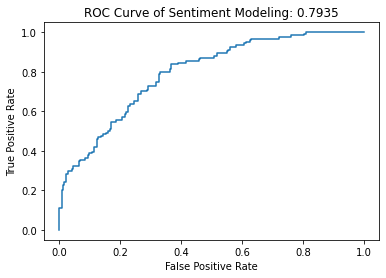

In [50]:
#plot ROC curve

#imports
from sklearn.metrics import *

#compute false positive,true positive rates, 
fpr, tpr, thresholds = roc_curve(y_test, new_y_pred_test, 
                                 pos_label = 1)

#compute area under ROC curve
auroc = roc_auc_score(y_test, new_y_pred_test)

#create the plot
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Sentiment Modeling: ' + str(round(auroc,5)))
plt.show()


## Confusion Matrix

In [ ]:
# standard threshold
as_threshold = 0.5 

# for test prediction results above threshold
as_dich_pred = (y_preds_test > as_threshold).astype(int)
as_dich_true = y_test

## computes accuracy
as_acc = accuracy_score(as_dich_true, as_dich_pred)

## confusion matrix
c_mat = confusion_matrix(as_dich_true, as_dich_pred)

#change two dimensional array into flattened array
TN, FP, FN, TP = c_mat.ravel()


print("Sentiment Model")
print("Accuracy: " + str(round(as_acc, 2)))
print("True positives: " + str(round(TP)))
print("True negatives: " + str(round(TN)))
print("False positives: " + str(round(FP)))
print("False negatives: " + str(round(FN)))

print("Confusion matrix")
print(c_mat)

Asthma model
Accuracy: 0.74
True positives: 43
True negatives: 223
False positives: 13
False negatives: 81
Confusion matrix
[[223  13]
 [ 81  43]]


##Compute Recall/Specificity/Precision

In [ ]:
## Compute metrics
as_sens = TP/(TP + FN)
as_spec = TN/(TN + FP)
as_prec = TP/(TP + FP)
  
print("Sensitivity (Recall): " + str(round(as_sens, 2)))
print("Specificity: " + str(round(as_spec, 2)))
print("Precision: " + str(round(as_prec, 2)))

Sensitivity (Recall): 0.35
Specificity: 0.94
Precision: 0.77
